<a href="https://colab.research.google.com/github/kashish049/Deep-Learning-Assignments/blob/main/Assignment_2(21dcs024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

1.Implement multilayer neural network with nonlinear activation functions (Sigmoid, bipolar sigmoid, Tanh, Mish, Hyperbolic Tangent Exponential Linear Unit (TeLU), ReLU, Leaky ReLU, Parametric RELU, Exponential Linear Unit  ELU, Softmax,  softplus  Swish, E-swish , Gaussian Error Linear Unit (GELU), Scaled Exponential Linear Unit (SELU) )  to analyze the response of the multilayer neural network.

Solution Using random Sample data which gives Binary Output (0 or 1)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

# Define input and output data
torch.manual_seed(0)
X = torch.rand(100, 5)  # 100 samples, 5 features
Y = torch.randint(0, 2, (100, 1), dtype=torch.float32)  # Binary output

input_size = 5
hidden_size = 10
output_size = 1

W1 = torch.randn(input_size, hidden_size, requires_grad=True)
b1 = torch.zeros(hidden_size, requires_grad=True)

W2 = torch.randn(hidden_size, hidden_size, requires_grad=True)
b2 = torch.zeros(hidden_size, requires_grad=True)

W3 = torch.randn(hidden_size, output_size, requires_grad=True)
b3 = torch.zeros(output_size, requires_grad=True)

# Define activation functions
activations = {
    "Sigmoid": F.sigmoid,
    "Bipolar Sigmoid": lambda x: 2 * torch.sigmoid(x) - 1,
    "Tanh": torch.tanh,
    "Mish": lambda x: x * torch.tanh(F.softplus(x)),
    "TeLU": lambda x: torch.tanh(x) * torch.exp(x),
    "ReLU": F.relu,
    "Leaky ReLU": F.leaky_relu,
    "PReLU": lambda x: F.prelu(x, torch.tensor(0.25)),
    "ELU": lambda x: F.elu(x, alpha=1.0),
    "Softmax": lambda x: F.softmax(x, dim=1),
    "Softplus": F.softplus,
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.5 * x * torch.sigmoid(x),
    "GELU": F.gelu,
    "SELU": F.selu,
}


**1.Signmoid Function**

Epoch 0, Loss: 0.7303682565689087
Epoch 100, Loss: 0.6957456469535828
Epoch 200, Loss: 0.6933739185333252
Epoch 300, Loss: 0.6917179226875305
Epoch 400, Loss: 0.6901400685310364
Epoch 500, Loss: 0.6886240243911743
Epoch 600, Loss: 0.687166154384613
Epoch 700, Loss: 0.6857631802558899
Epoch 800, Loss: 0.6844122409820557
Epoch 900, Loss: 0.6831108331680298


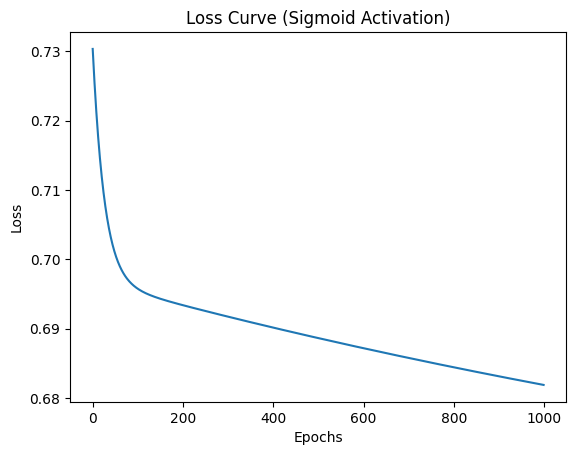

In [ ]:

# Select an activation function
activation_name = "Sigmoid"
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Final layer activation

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**2.Bipolar Sigmoid**

Epoch 0, Loss: 1.0572291612625122
Epoch 100, Loss: 0.6642357707023621
Epoch 200, Loss: 0.6540459394454956
Epoch 300, Loss: 0.6483145356178284
Epoch 400, Loss: 0.6441934108734131
Epoch 500, Loss: 0.6411399245262146
Epoch 600, Loss: 0.6388048529624939
Epoch 700, Loss: 0.6369589567184448
Epoch 800, Loss: 0.635450005531311
Epoch 900, Loss: 0.6341768503189087


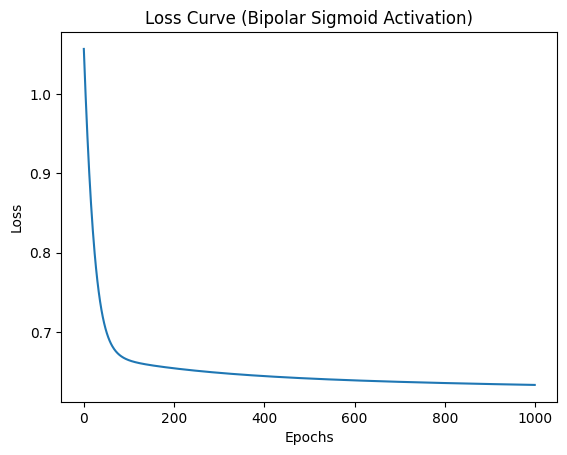

In [ ]:

# Select an activation function
activation_name = "Bipolar Sigmoid"
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Final layer activation

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**3.Tanh**

Epoch 0, Loss: 0.6639361381530762
Epoch 100, Loss: 0.6253677010536194
Epoch 200, Loss: 0.6160674095153809
Epoch 300, Loss: 0.6087074279785156
Epoch 400, Loss: 0.6024617552757263
Epoch 500, Loss: 0.5968823432922363
Epoch 600, Loss: 0.591737687587738
Epoch 700, Loss: 0.586901843547821
Epoch 800, Loss: 0.582298994064331
Epoch 900, Loss: 0.5778784155845642


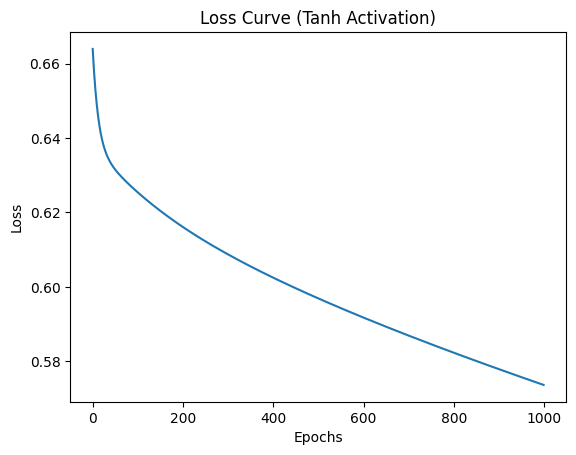

In [ ]:

# Select an activation function
activation_name = "Tanh"
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Final layer activation

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**4.Mish**

Epoch 0, Loss: 2.8649768829345703
Epoch 100, Loss: 0.7423958778381348
Epoch 200, Loss: 0.6477202773094177
Epoch 300, Loss: 0.6165047287940979
Epoch 400, Loss: 0.6006156802177429
Epoch 500, Loss: 0.5898969173431396
Epoch 600, Loss: 0.5815533399581909
Epoch 700, Loss: 0.5746298432350159
Epoch 800, Loss: 0.5686901211738586
Epoch 900, Loss: 0.5634799003601074


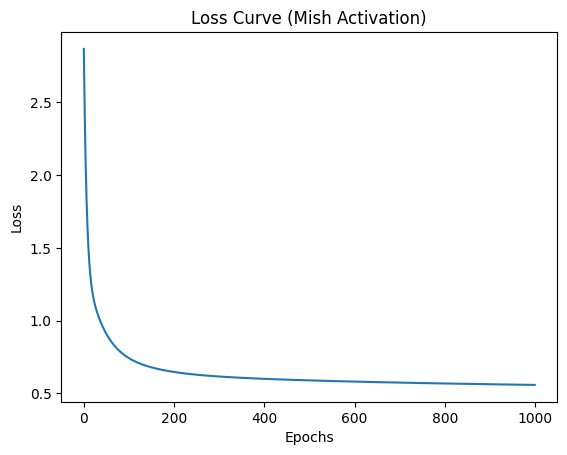

In [ ]:

# Select an activation function
activation_name = "Mish"
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Final layer activation

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**5.ReLU**

Epoch 0, Loss: 1.0266129970550537
Epoch 100, Loss: 0.6979011297225952
Epoch 200, Loss: 0.6309880614280701
Epoch 300, Loss: 0.5946216583251953
Epoch 400, Loss: 0.5783487558364868
Epoch 500, Loss: 0.5660136342048645
Epoch 600, Loss: 0.5564045906066895
Epoch 700, Loss: 0.54746413230896
Epoch 800, Loss: 0.5400791764259338
Epoch 900, Loss: 0.53312087059021


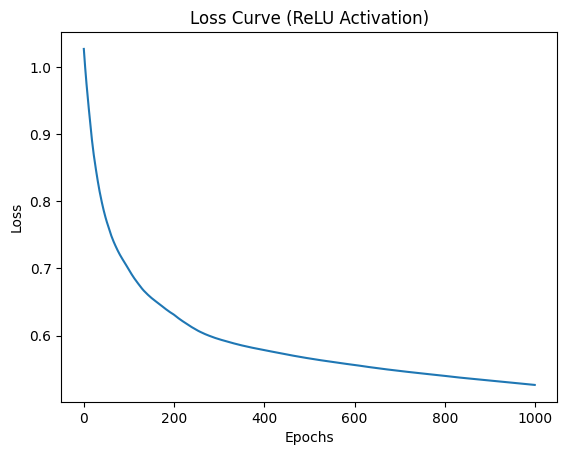

In [ ]:
activation_name = "ReLU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**6.Leaky ReLU**

Epoch 0, Loss: 0.52960604429245
Epoch 100, Loss: 0.5210938453674316
Epoch 200, Loss: 0.5157976150512695
Epoch 300, Loss: 0.5109319686889648
Epoch 400, Loss: 0.5065310001373291
Epoch 500, Loss: 0.5024612545967102
Epoch 600, Loss: 0.49869006872177124
Epoch 700, Loss: 0.49530550837516785
Epoch 800, Loss: 0.4920772314071655
Epoch 900, Loss: 0.4889270067214966


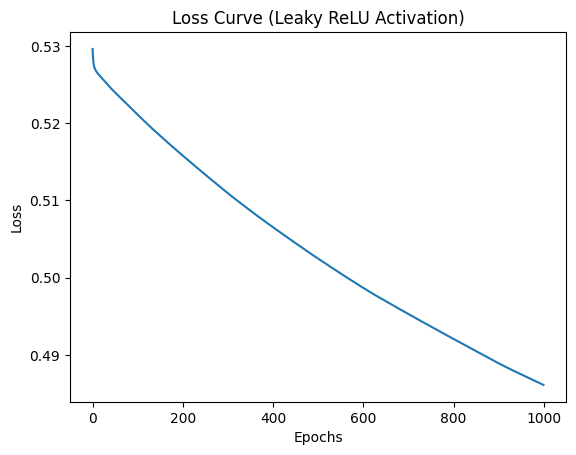

In [ ]:
activation_name = "Leaky ReLU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**7.PReLU**

Epoch 0, Loss: 1.6549311876296997
Epoch 100, Loss: 0.5273857712745667
Epoch 200, Loss: 0.5189910531044006
Epoch 300, Loss: 0.5130767226219177
Epoch 400, Loss: 0.5086553692817688
Epoch 500, Loss: 0.5051627159118652
Epoch 600, Loss: 0.5013017654418945
Epoch 700, Loss: 0.49746954441070557
Epoch 800, Loss: 0.494413822889328
Epoch 900, Loss: 0.49152159690856934


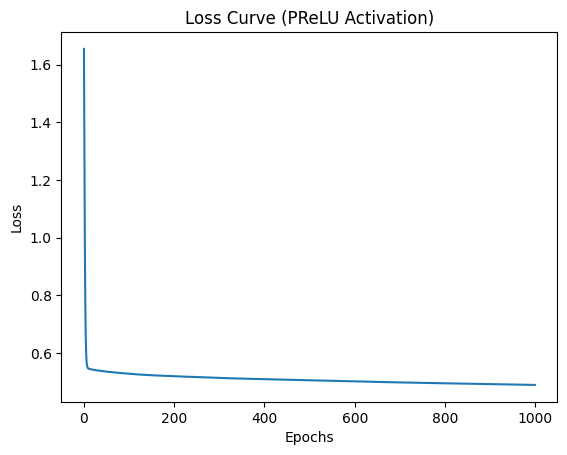

In [ ]:
activation_name = "PReLU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**8.ELU**

Epoch 0, Loss: 0.8085082173347473
Epoch 100, Loss: 0.5632885694503784
Epoch 200, Loss: 0.5450640916824341
Epoch 300, Loss: 0.5348373651504517
Epoch 400, Loss: 0.5274141430854797
Epoch 500, Loss: 0.5215098857879639
Epoch 600, Loss: 0.5164956450462341
Epoch 700, Loss: 0.5120874643325806
Epoch 800, Loss: 0.5081183910369873
Epoch 900, Loss: 0.504496157169342


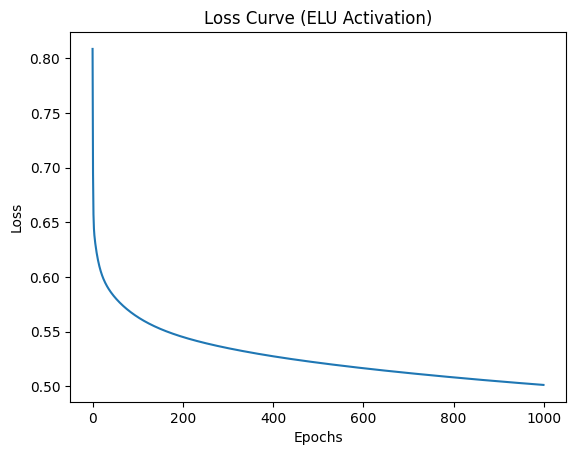

In [ ]:
activation_name = "ELU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**9.Softmax**

Epoch 0, Loss: 0.6903781294822693
Epoch 100, Loss: 0.6888062357902527
Epoch 200, Loss: 0.6878997087478638
Epoch 300, Loss: 0.6873430013656616
Epoch 400, Loss: 0.6869691610336304
Epoch 500, Loss: 0.686690092086792
Epoch 600, Loss: 0.6864597201347351
Epoch 700, Loss: 0.6862537860870361
Epoch 800, Loss: 0.6860597133636475
Epoch 900, Loss: 0.6858706474304199


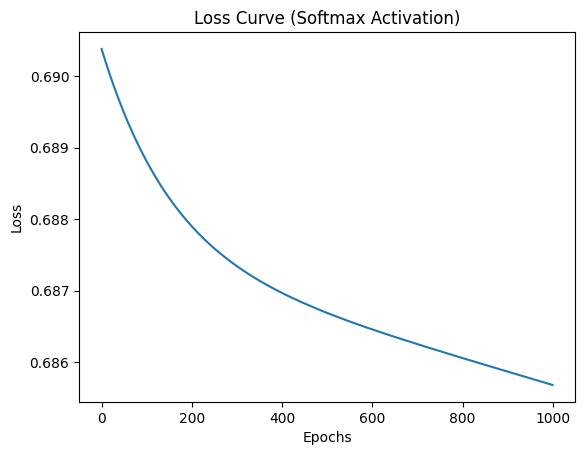

In [ ]:
activation_name = "Softmax"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**10.Softplus**

Epoch 0, Loss: 2.906856060028076
Epoch 100, Loss: 0.6334013938903809
Epoch 200, Loss: 0.6151648163795471
Epoch 300, Loss: 0.6050930619239807
Epoch 400, Loss: 0.5986806154251099
Epoch 500, Loss: 0.5941460132598877
Epoch 600, Loss: 0.5905953049659729
Epoch 700, Loss: 0.5875730514526367
Epoch 800, Loss: 0.5848432183265686
Epoch 900, Loss: 0.5822802782058716


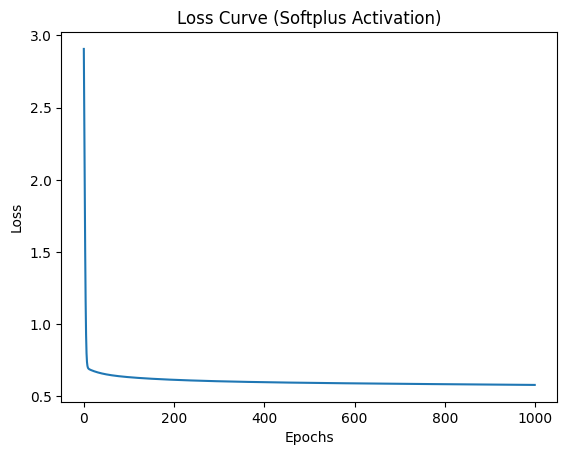

In [ ]:
activation_name = "Softplus"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**11.Swish**

Epoch 0, Loss: 0.7063288688659668
Epoch 100, Loss: 0.5412172079086304
Epoch 200, Loss: 0.5308453440666199
Epoch 300, Loss: 0.5258030891418457
Epoch 400, Loss: 0.5225009918212891
Epoch 500, Loss: 0.5199035406112671
Epoch 600, Loss: 0.5176622867584229
Epoch 700, Loss: 0.5156328082084656
Epoch 800, Loss: 0.5137447118759155
Epoch 900, Loss: 0.5119599103927612


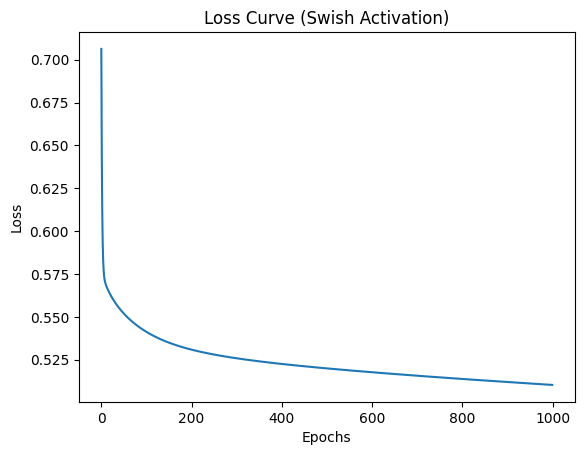

In [ ]:
activation_name = "Swish"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**12.E-Swish**

Epoch 0, Loss: 0.5712470412254333
Epoch 100, Loss: 0.515788733959198
Epoch 200, Loss: 0.49954304099082947
Epoch 300, Loss: 0.4886913299560547
Epoch 400, Loss: 0.48046067357063293
Epoch 500, Loss: 0.47383373975753784
Epoch 600, Loss: 0.46827155351638794
Epoch 700, Loss: 0.46344539523124695
Epoch 800, Loss: 0.45914092659950256
Epoch 900, Loss: 0.4552140533924103


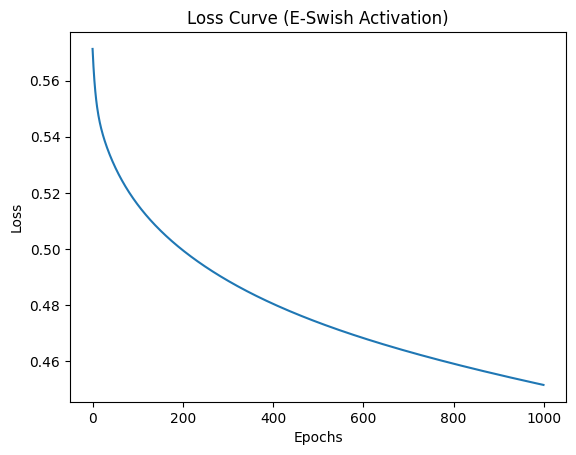

In [ ]:
activation_name = "E-Swish"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**13.GELU**

Epoch 0, Loss: 0.5341839790344238
Epoch 100, Loss: 0.48382455110549927
Epoch 200, Loss: 0.4787265658378601
Epoch 300, Loss: 0.4748067557811737
Epoch 400, Loss: 0.47149458527565
Epoch 500, Loss: 0.4685662090778351
Epoch 600, Loss: 0.4658888280391693
Epoch 700, Loss: 0.4633786380290985
Epoch 800, Loss: 0.4609818756580353
Epoch 900, Loss: 0.45866477489471436


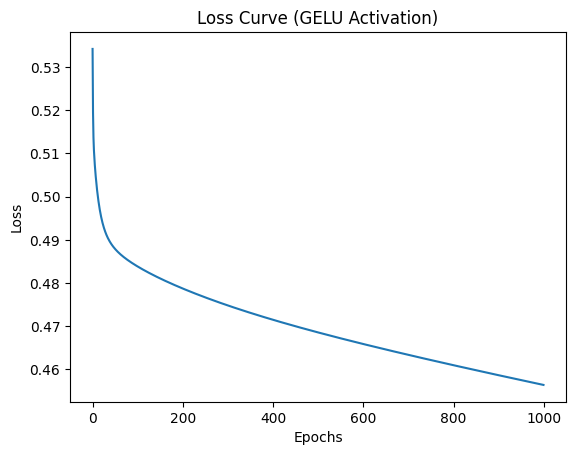

In [ ]:
activation_name = "GELU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


**14.SELU**

Epoch 0, Loss: 3.8323843479156494
Epoch 100, Loss: 0.6074656844139099
Epoch 200, Loss: 0.5337140560150146
Epoch 300, Loss: 0.49043160676956177
Epoch 400, Loss: 0.4683234393596649
Epoch 500, Loss: 0.4570778012275696
Epoch 600, Loss: 0.44928959012031555
Epoch 700, Loss: 0.4422755837440491
Epoch 800, Loss: 0.4360925555229187
Epoch 900, Loss: 0.42974305152893066


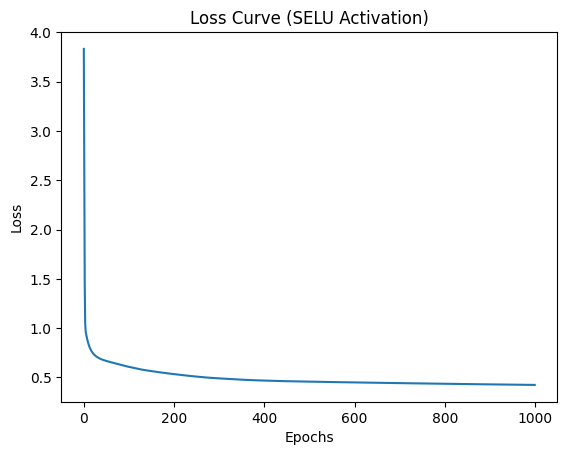

In [ ]:
activation_name = "SELU"  # Change this to test different functions
activation_fn = activations[activation_name]

# Forward pass
def forward(X):
    z1 = X @ W1 + b1
    a1 = activation_fn(z1)

    z2 = a1 @ W2 + b2
    a2 = activation_fn(z2)

    z3 = a2 @ W3 + b3
    y_pred = torch.sigmoid(z3)  # Ensure output is between 0 and 1
    y_pred = torch.clamp(y_pred, min=1e-6, max=1 - 1e-6)  # Avoid log(0) error in BCE Loss

    return y_pred

# Loss function
loss_fn = nn.BCELoss()
optimizer = optim.SGD([W1, b1, W2, b2, W3, b3], lr=0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = forward(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"Loss Curve ({activation_name} Activation)")
plt.show()


2.Explore Problems Associated with Activation Functions (Vanishing Gradient and Exploding Gradient).

Explore the possible  modifications in the activation function and report your results.


# **Problems with Activation Functions**
Vanishing Gradient Problem Occurs when gradients become too small during backpropagation, preventing weight updates. It is common in Sigmoid, Tanh, and Softmax due to their small gradient ranges.
Leads to slow learning and dead neurons in deep networks.

Sigmoid's derivative is maximum at 0.25 but very close to zero at large values.
Tanh suffers from the same problem as its derivative approaches zero for large values.


Exploding Gradient Problem
Occurs when gradients become too large, making weight updates unstable.
Common when using poor weight initialization or non-bounded activations like ReLU in deep networks.
Causes unstable training and divergence of loss.

ReLU doesn’t bound activations, allowing unbounded weight growth.
Improper weight initialization exacerbates the issue.


Modifications we can do are :

(i) Scaled Sigmoid
Modification: Adds a scaling factor k to adjust the steepness, allowing faster learning or improved stability based on the value of k.
(ii) Zero-Centered Sigmoid
Modification: Shifts the output to the range \, helping to avoid bias shift and stabilize training by centering activations.
(iii) Hard Sigmoid
Modification: Uses a piecewise linear approximation of sigmoid, reducing computation time but sacrificing some accuracy for efficiency.
(iv) Log-Sigmoid
Modification: Applies a logarithmic transformation to sigmoid, improving numerical stability, especially with very small values or probabilities.
(v) Beta-Sigmoid (Learnable Sigmoid)
Modification: Introduces a learnable parameter
𝛽
β to dynamically adjust the steepness of the sigmoid function, offering adaptive flexibility during training.

# 3.Examine the performance of various activation functions for MNIST, Fashion-MNIST, CIFAR-10, and CIFAR-100.
For training,  use the architectures ResNet, LeNet, MobileNet, AlexNet, with different learnable depths

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, models

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define data transformation and normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Load Datasets
datasets_dict = {
    "MNIST": datasets.MNIST(root='./data', train=True, download=True, transform=transform),
    "Fashion-MNIST": datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform),
    "CIFAR-10": datasets.CIFAR10(root='./data', train=True, download=True, transform=transform),
    "CIFAR-100": datasets.CIFAR100(root='./data', train=True, download=True, transform=transform),
}




Files already downloaded and verified
Files already downloaded and verified


In [ ]:
data_loaders = {key: DataLoader(value, batch_size=64, shuffle=True) for key, value in datasets_dict.items()}

# Define LeNet model with dynamic input size
class LeNet(nn.Module):
    def __init__(self, activation_fn, input_channels=3):  # Default is 3 for CIFAR
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 6, 5)  # Input channels can be 1 (MNIST) or 3 (CIFAR)
        self.conv2 = nn.Conv2d(6, 16, 5)

        # To calculate the correct size of the fully connected layer, we need the output size of the convolution layers
        # We will use a dummy tensor to calculate this size later

        self.fc1 = None  # Placeholder, will be dynamically set

        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation_fn = activation_fn

    def forward(self, x):
        # Apply the first convolution, activation, and pooling
        x = self.activation_fn(self.conv1(x))
        x = self.activation_fn(self.conv2(x))

        # Automatically calculate the size of the flattened tensor after convolutions
        x = x.view(x.size(0), -1)  # Flatten
        if self.fc1 is None:  # First forward pass, calculate the fc1 input size
            self.fc1 = nn.Linear(x.size(1), 120)  # Set fc1 input size dynamically
        x = self.activation_fn(self.fc1(x))  # Apply activation function after fully connected layers
        x = self.activation_fn(self.fc2(x))
        x = self.fc3(x)  # Output layer (no activation)
        return x

# Choose Activation Functions
activation_functions = {
    'sigmoid': nn.Sigmoid(),
    'tanh': nn.Tanh(),
    'relu': nn.ReLU(),
    'softmax': nn.Softmax(dim=1)  # Softmax for classification tasks
}

# Training Function
def train_model(model, activation_fn, train_loader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss includes softmax, no need to apply softmax manually
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Evaluating the models on each dataset and activation function
for dataset_name, data_loader in data_loaders.items():
    print(f"Training on {dataset_name} Dataset:")

    # For each dataset, determine the number of input channels
    input_channels = 1 if dataset_name in ["MNIST", "Fashion-MNIST"] else 3

    for activation_name, activation_fn in activation_functions.items():
        print(f"\nUsing {activation_name} Activation Function:")

        # Select architecture
        model = LeNet(activation_fn, input_channels=input_channels)  # Dynamically choose input channels
        train_model(model, activation_fn, data_loader)

        print("-" * 50)

Training on MNIST Dataset:

Using sigmoid Activation Function:
Epoch 1/10, Loss: 2.0983011251065267
Epoch 2/10, Loss: 1.0977701649609914
Epoch 3/10, Loss: 0.6597038817240485
Epoch 4/10, Loss: 0.49999680222351667
Epoch 5/10, Loss: 0.4157251079104094
Epoch 6/10, Loss: 0.3627572050576271
Epoch 7/10, Loss: 0.3255316274188983
Epoch 8/10, Loss: 0.2991539352754159
Epoch 9/10, Loss: 0.27660015057017806
Epoch 10/10, Loss: 0.25989794152091816
--------------------------------------------------

Using tanh Activation Function:
Epoch 1/10, Loss: 0.4316037724386337
Epoch 2/10, Loss: 0.17043659087421417
Epoch 3/10, Loss: 0.1283662073723257
Epoch 4/10, Loss: 0.10499376022934055
Epoch 5/10, Loss: 0.08997846717066539
Epoch 6/10, Loss: 0.07927440121215877
Epoch 7/10, Loss: 0.07030555009563912
Epoch 8/10, Loss: 0.06339934843082005
Epoch 9/10, Loss: 0.058817661198815194
Epoch 10/10, Loss: 0.05340187686673209
--------------------------------------------------

Using relu Activation Function:
Epoch 1/10, Los